# 3.8 Excercises

## 3.1
 Let $Y_1, Y_2, \cdot, Y_T$ be a random sample from a population with mean $\beta$ and variance $\sigma^2$. Let $b^{*}_T$ be an estimator of $\beta$ given by: $$b^*_T = \frac{\sum^T i\cdot Y_i}{\sum^T i}$$

- Show that $b^*$ is a linear estimator

**R/=** \
Note that:
$$

\begin{aligned}

b^* = (\frac{1}{\sum^T i}) \cdot (\sum^T i\cdot Y_i) \\
 = \sum^T (\frac{i}{\sum^T i}) Y_i \\

\end{aligned}
$$

If we define $a_i = \frac{i}{\sum^T i}$ we have $b^* = \sum^T a_iY_i$ which indeed shows $b^*$ is a linear estimator of $\beta$. 

- Show that $b^*$ is a unbiased 

**R/=** 

$$
\begin{aligned}

\mathrm{E}[b^*] = \mathrm{E}\left[ \frac{\sum^T i\cdot Y_i}{\sum^T i} \right] \\
= \frac{1}{(\sum^T i)^2}\cdot \sum^T i^2 \text{var}(Y_i) \\
= \frac{1}{(\frac{T(T+1)}{2})^2}\cdot (\frac{T(T+1)(2T+1)}{6})\cdot \sigma^2

\end{aligned}

$$

Simplifying this latest expression, we get: 

$$

\begin{aligned}

\text{Var}(b^*) = \frac{2\cdot \sigma^2}{3} \cdot \frac{2T + 1}{T(T+1)}

\end{aligned}
$$

- Show that $b^*$ is a consistent


**R/=**

SInce $b^*$ is unboased, then is asymptotically unbiased, then we must show that.
$$

\begin{aligned}


\lim_{T \rightarrow \infty}  \text{Var}(b^*) = 0


\end{aligned}
$$

Indeed:

$$

\begin{aligned}


\lim_{T \rightarrow \infty}  \text{Var}(b^*) = 0 \\
= \frac{2\cdot \sigma^2}{3} \cdot \lim_{T \rightarrow \infty} (\frac{2T+1}{T^2 + T}) \\
\left \langle  \text{L'Hospital Rule} \right \rangle \\
= \frac{2\cdot \sigma^2}{3} \cdot \lim_{T \rightarrow \infty} \frac{2}{2T+1} \\
= 0 \\


\end{aligned}
$$

Which shows $b^*$ is a consistent estimator of $\beta$.

- Compare $b^*$ with the sample mean $\hat{b}  = \frac{\sum^T Y_i}{T}$ as an estimator of $\beta$.

**R/=**

To compare $b^*$ with $\hat{b}$, we compare them in efficiency terms because both are lineal and unibiased. 

Thus, we comare the variances. 

$$
\begin{aligned}

\text{Var}(b^*) = \frac{2\cdot \sigma^2}{3} \cdot \frac{2T + 1}{T(T+1)} \ \wedge \  \text{Var}(\hat{b}) = \frac{\sigma^2}{T}

\end{aligned}

$$

Let's see that $\hat{b}$ is better that $b^*$, Indeed.

$$
\begin{aligned}

\text{Var}(\hat{b}) < \text{Var}(b^*) \\
\Leftarrow \\

\text{Var}(\hat{b}) - \text{Var}(b^*) < 0 \\

\equiv \\

\frac{\sigma^2}{T} - \frac{2\sigma^2}{3}\cdot (\frac{2T+1}{T(T+1)}) < 0 \\

\equiv  \\
\sigma^2 \cdot (\frac{1}{T} - \frac{4T-2}{3T(T+1)})<0 \\

\Leftarrow \\
\frac{1}{3T}\frac{1-T}{(1+T)} < 0 \\
\end{aligned}


$$
Which apporaches $0$ from the left as the sample sizes increses, Thus.
$$\text{Var}(\hat{b}) < \text{Var} (b^*)$$ 

Therefore $\hat{b}$ is better $\beta$-estimate than $ b^*$.


## 3.2
We wish to test a hypothesis about the mean $\beta$ of a normal population that has known variance $\sigma^2 = 81$. We have a random sample of size $T=9$ and wish to test $H_0: \beta = 10$ against $H_i: \beta \neq 10$. Compute the power of the usual likelihood ratio test at $\beta = -10,-5,0,6$ at $\alpha = 0.05$










**R:/** 

Given $Y \sim N(\beta, \sigma^2 = 81), H_0: \beta = 10, \alpha = 0.05$.

We consider an unbiased and consistent estimator  $\hat{\beta_{T}} \sim N(\beta, \frac{81}{9}=9)$

The likelihood ratio $\lambda$ is given by:
$$
\lambda = \frac{L(10)}{L(\frac{\sum^9 Y_i}{9})}
$$

From where we obtain that under the null hypothesis $H_0$ we have:

$$

z= \frac{\hat{\beta_{T}} - 10}{3} \sim N(0,1)\\
\implies \\
\mid z_{(\alpha/2)}\mid = 1.96
$$


Which defines the region where at a confidence level of $1-\alpha = 95\%$ we are willing to accept $\beta = 10$ which is defined by the estimate value of $\beta$ given a sample with size $T$  $\hat{\beta_T}$:

$$

\Omega_{H_0} = \left\{ 4.12 \leq \hat{\beta_{T}} \leq 15.88\right\}

$$



To calculate $\Pi^{\lambda} (\beta)$ for the given values of $\beta$, $\beta = -10,-5,0,6$, we have:
  
$$

\Pi^{\lambda}(\beta) = 1- P(\frac{4.12 - \beta}{3} \leq \frac{\hat{\beta_T}-\beta}{3} \leq \frac{15.88 -\beta}{3}\mid \beta) \\

= \\
1- P(\frac{4.12 - \beta}{3} \leq z \leq \frac{15.88 -\beta}{3}); \ \ z \sim N(0,1)
$$


Let's compute the power for each $\beta$.

In [2]:
from scipy.stats import norm

betas = [-10,-5,0,6]

#norm.cdf(val,loc=0,scale=1)
#takes a beta in betas and substrac
def powerTest(params):
    
    for i, beta in enumerate(betas):
        lower_bound, higher_bound = (4.12 - beta) / 3, (15.88- beta) / 3
        print({f'beta_{i+1}': beta, 'power': 1- (norm.cdf(higher_bound, loc=0, scale=1) - norm.cdf(lower_bound, loc=0, scale=1))})

powerTest(betas)

{'beta_1': -10, 'power': np.float64(0.9999987409993417)}
{'beta_2': -5, 'power': np.float64(0.998817109258597)}
{'beta_3': 0, 'power': np.float64(0.9151756877894348)}
{'beta_4': 6, 'power': np.float64(0.26593391421922574)}


## 3.4
Let $Y$ be a discrete (geometric) random variable with p.d.f.

$$
f(y) = p(1-p)^{y-1}
$$

where $p$ is an unknown parameter. Find the maximum likelihood estimate of $p$ if only one sample observation is available.


**R/**

The MLE estimator is given by 

$$

l(p\mid y_i) = p(1-p)^{y_1 -1}

$$

To find the estimate $\hat{p}_1$ we maximize the log-maximum likelihood for the the given obeservation, this is:

$$
L(p) = \log(l(p\mid y_i))= \log(p) + (y_1-1)\log(1-p)
$$

Let's now find the maximum of $L$ using the second derivative rule. This is:
$$

\frac{\partial L}{\partial p} = \frac{1}{p} + \frac{1-y_1}{1-p} = \frac{1-p + p -py_1}{p(1-p)} = \frac{1-py_1}{p(1-p)}

$$
Setting this equal to zero and solving for $p$ gives us:
$$
\frac{\partial L}{\partial p} = 0 \\

\implies \\

1-py_1 = 0  \\
\implies \\

\hat{p_1} = \frac{1}{y_1}
$$

Taking second derivative of $L$, we get:

$$

\frac{\partial^{2} L}{(\partial p)^{2}} = \frac{y_1 -1}{(1-p)^2} -\frac{1}{p^2} \\

\implies \\

\frac{\partial^{2} L}{(\partial p)^{2}} (\hat{p_1} ) = \frac{y_1 -1}{(1-\frac{1}{y_1})^2} -\frac{1}{(\frac{1}{y_1})^2} \\

\equiv \\

\frac{\partial^{2} L}{(\partial p)^{2}} (\hat{p_1} ) = \frac{y_1^2}{y_1 -1} - y_1^{2} = y_1^2(\frac{1}{y_1 -1} - 1)
$$

Since $y_1 > 0$ if $y_1  > 2$ then $\hat{p_1} = \frac{1}{y_1}$ is an estiamte of $p$.



## 3.5

Let $Y_1, \cdots, Y_T$ be a random sample from a population with p.d.f

$$

f(y) = \frac{1}{\Gamma(\alpha)\theta^{\alpha}}y^{\alpha-1}e^{-\frac{y}{\theta}} \ \ y> 0 \\

$$

which is a gamma distribution (which has mean $E[Y] =\alpha\theta$ and variance $var(Y) = \alpha \theta^{2}$).

**a.** Find the maximum likelihood estimator of $\theta$ if $\alpha$ is known.

**R/**

The maximum likelihood estimator is derived from the maximization of the log-likelihood function, where the likelihood function for the given gamma distribution for the population and sample with size $T$ (assuming the observations are independent) is given by:

$$
\begin{aligned}
\ell(\theta) = \prod_{i=1}^{T} \frac{1}{\Gamma(\alpha)\theta^{\alpha}}y_i^{\alpha-1}e^{-\frac{y_i}{\theta}} \\
 = \frac{1}{(\Gamma(\alpha))^{T}\theta^{\alpha \cdot T}} \prod_{i=1}^{T}y_i^{\alpha-1}e^{-\frac{y_i}{\theta}} \\

\end{aligned}

$$

$$

\implies \\

L(\theta) = \log(\ell(\theta)) = ((\alpha -1)\sum_{i=1}^{T} \log(y_i) - T\cdot \log(\Gamma(\alpha))) -(\frac{\sum_{i=1}^{T} y_i}{\theta} + \alpha \cdot T \log(\theta))  \\
$$


To find the maximum of $L$, we take the derivative with respect to $\theta$ and set it equal to zero:

$$

\frac{\partial L}{\partial \theta} = \frac{\sum_{i=1}^{T} y_i}{\theta^{2}}-\frac{\alpha \cdot T}{\theta} = \frac{\theta \sum_{i=1}^{T} y_i - \theta^{2}\alpha T}{\theta^{3}} \\
\\
\frac{\partial L}{\partial \theta} = 0 \implies -(\alpha T)\hat{\theta_T}^{2} + \hat{\theta_T}\sum_{i=1}^{T} y_i = 0 \\
\\
\implies \\
\boxed{\hat{\theta_T} = \frac{\sum_{i=1}^{T} y_i}{\alpha T}}
$$



**b.** Show that the maximum likelihood estimator is unbiased, consistent and efficient.


**R/**

- **Unbiased ($\hat{\theta_T}$):**
  - $$

    \mathrm{E}(\hat{\theta_T}) = \sum_{i=1}^{T} \frac{\mathrm{E}(y_i)}{\alpha T} \\
    \\
    = \frac{\sum_{i=1}^{T} \alpha \theta}{\alpha T} = \frac{\alpha T \theta}{\alpha T} \\
    \\
    = \theta
    $$
- **Consistent($\hat{\theta_T}$):**
- **Efficient($\hat{\theta_T}$):**

## 3.6

Let $Y_1, \cdots, Y_T$ be a random sample from a population with p.d.f

$$

f(y) = \frac{\lambda^{y}e^{-\lambda}}{y!}, \ \ y = 0,1, \cdots 

$$

$Y$ is a Poisson random variable and has a mean and variance equal to the parameter $\lambda$.

**a.** Find the maximum likelihood estimator of $\lambda$.

**R/**

The maximum likelihood estimator is derived from the maximization of the log-likelihood function, where the likelihood function for the given Poisson distribution for the population and sample with size $T$ (assuming the observations are independent) is given by:

$$


\ell(\lambda) = \prod_{i=1}^{T} \frac{\lambda^{y_i}e^{-\lambda}}{y_i!} \\
= e^{-\lambda T} \prod_{i=1}^{T} \frac{\lambda^{y_i}}{y_i!} \\
\\

\implies \\

L(\lambda) = \log(\ell(\lambda)) = -\lambda T + \sum_{i=1}^{T} y_i \cdot \log(\lambda) - \log(y_i !)\\
\\

\implies \\

\frac{\partial L}{\partial \lambda} = \frac{\sum_{i=1}^{T} y_i}{\lambda} - T = 0 \\

\implies \\


\sum_{i=1}^{T} y_i - \hat{\lambda_T} T = 0 \\
\\

\implies \\

\boxed{\hat{\lambda_T} = \frac{\sum_{i=1}^{T} y_i}{T}}

$$

**b.** Find the mean and variance of the maximum linkelihood estimator of $\lambda$ and show it is consistent.


**R/**

Notice that $\hat{\lambda_T}$ is unbiased, indeed:

$$


\mathrm{E}(\hat{\lambda_T}) = \frac{\sum_{i=1}^{T} \mathrm{E}(y_i)}{T} = \frac{\lambda T}{T} = \lambda

$$

And $\lim_{T\rightarrow \infty} \mathrm{E}(\hat{\lambda_T}) = \lambda $. Thus $\hat{\lambda_T}$ is asymptotically unbiased.


The variance of $\hat{\lambda_T}$ is given by:
$$

Var(\hat{\lambda_T}) = \frac{1}{T^2} \sum_{i=1}^{T} Var(y_i) = \frac{\lambda}{T} \\
\\
\implies \\
\lim_{T \rightarrow \infty} Var(\hat{\lambda_T}) = \lambda \lim_{T \rightarrow \infty}  \frac{1}{T} = 0 \\

$$

which shows that $\hat{\lambda_T}$ is asymptotically efficient.

Since $\hat{\lambda_T}$ is asymptotically efficient and  asymptotically unbiased then $\hat{\lambda_T}$ is consistent.



**c.** What is the asymptotic distribution of the ML estimator of $\lambda$.


**R/**

Since  $\hat{\lambda_T} = \frac{\sum_{i=1}^{T} y_i}{T}$, by the central limit theorem:

$$

\hat{\lambda_T} \overbrace{\sim}^{\text{asy}} N(\lambda, \frac{\lambda}{T})
$$

**d.** Is the ML estimator efficient in either large or small samples (or both ?) 

**R/**

- When $T \rightarrow 0$ since $\hat{\lambda_T} = \frac{\sum_{i=1}^{T} y_i}{T}$, then:
$$

-\frac{1}{\mathrm{E}\left[ \frac{\partial^{2}L}{\partial \lambda^2}\right]} = \frac{\lambda}{T} = Var(\hat{\lambda_T})

$$

Thus, $\hat{\lambda_T}$ is efficient in small samples.

- When $T \rightarrow \infty$ since $\hat{\lambda_T} $ is consistent, then $\hat{\lambda_T} $ is asymptotically effificient.


Therefore, $\hat{\lambda_T} $ is efficient in small samples **and** large samples. 

## 3.7

A random sample of size $T$ is taken from a population with p.d.f.

$$

f(y) = (\theta +1)y^{\theta}, \ 0 < y < 1

$$

**a.** Find the estimator of $\theta$ using the method of moments.

**R/**

Using the definition of moments of a random variable, we calculate the first moment of $Y$ as:

$$

\mathrm{E}(Y) = \int_{0}^{1} yf(y)dy \\
= (\theta +1) \int_{0}^{1} y^{\theta+1}dy \\
= (\theta +1) (\frac{y^{\theta+2}}{\theta +2})\mid_{0}^{1} \\
= \frac{\theta +1}{\theta +2} \\
$$

Then solving for $\theta$ we have.

$$

\hat{\theta^{MM}_{T}} = \frac{2\cdot\mathrm{E}(Y)-1}{1-\mathrm{E}(Y)}
$$

If we take the estimate value of the expected value $\hat{\mathrm{E}(Y)} = \frac{\sum_{i=1}^{T} Y_i}{T}$, we obtain the estimate of $\hat{\theta^{MM}_{T}}$ in terms of the sample observations, we have:


$$

\boxed{\hat{\theta^{MM}_{T}} = \frac{2\cdot \sum_{i=1}^{T} Y_i - T}{T -\sum_{i=1}^{T}Y_i} }

$$


**b.** Find the maximum likelihood estimator of $\theta$

**R/**


To find the maximum likelihood estimator of $\theta$ we write the likelihood function as:

$$

\ell (\theta) = \prod_{i=1}^{T} (1+\theta)y_i^{\theta} \\
= (1+\theta)^{T} \prod_{i=1}^{T} y_i^{\theta} \\
$$

Then we find the maximum value that $\theta$ takes in the log-likelihood function. This is:

$$


L(\theta) = T \cdot \log(1+\theta) + \theta\sum_{i=1}^{T}\log(y_i) \\

\implies \\

\frac{\partial L }{\partial \theta} = \frac{T}{1+\theta} + \sum_{i=1}^{T}\log(y_i) = \frac{T + (1+\theta)

\sum_{i=1}^{T}\log(y_i)}{1+\theta} \\ 

\frac{\partial L }{\partial \theta} = 0 \\

\implies \\

T + (1+\theta)

\sum_{i=1}^{T}\log(y_i) = 0 \\

\implies \\

\hat{\theta_T} = \frac{T + \sum_{i=1}^{T}-\log(y_i) }{\sum_{i=1}^{T}-\log(y_i)} \\

$$
Notice that since $0<y<1$, then $\log(y_i) <0$, therefore $\hat{\theta_T} >0$

## 3.8

Let $Y_1, \cdots Y_T$ be a random sample from a $N(\beta, 1)$ distribution. Derive the likelihood ratio test for the hypothesis that $H_0: \beta =0$ against $H_1: \beta \neq 0$.

**R/**


We dfine the likelihood ratio as 

$$

\lambda = \frac{L(0)}{L(\hat{\beta_T})}

$$

Since $Y \sim N(\beta, 1)$, we get:

$$


\lambda = \exp \left\{ -\frac{1}{2} (\sum_{i=1}^{T} Y_i^2 - \sum_{i=1}^{T} (Y_i - \hat{\beta_T})^{2})\right\} \\
= \exp \left\{-\frac{T\cdot \hat{\beta_T^2}}{2}\right\}\\

\implies \\

\alpha = P (-\frac{T\cdot \hat{\beta_T^2}}{2} \leq \lambda^*) \\
\implies \\

\alpha = P (\sqrt{T}\cdot \hat{\beta_T} \leq \sqrt{-2\cdot \lambda^*}) \\
\equiv \\

\alpha = P(\frac{\hat{\beta_T}}{1/\sqrt{T}} \leq \sqrt{-2\cdot \lambda^*}\mid \beta_0 = 0) \\



$$

Taking $z = \frac{\hat{\beta_T}}{1/\sqrt{T}}$ if $z \sim N(0,1)$ which at $\alpha = 0.05$ is when  $\mid z \mid \leq z_{\alpha/2} =1.96$

## 3.9

Consider the lineal model for the mean of a population:

$$

y_i = \beta + e_i

$$

In this exercise you will carry out a Monte Carlo experiment that illustrates the statistical properties of the sample mean as an estimator of $\beta$. In order to generate the $y_i$ values let $\beta =5$ and let the random disturbances $e_i\sim U(0,2)$. Specifically the p.d.f of the random disturbance $e$ will be:

$$

f(e) = 
\begin{cases}

\frac{1}{2\cdot \sqrt{6}} & \mid e \mid \leq \sqrt{6}\\
0 & \text{otherwise}

\end{cases}
$$

Your instructor will show you how to generate $100$ samples of the $e_i$'s with $10$ observations each. Then by adding $5$ to these values, $100$ samples of size $10$ from a uniformly distributed population with mean $5$ and variance $2$ are generated.



### Process Generation

In [3]:
import random
import math
import pandas as pd

random.seed(1)

beta, sigma_squared = 5,2
num_samples = 100
num_observations = 10

samples = [[beta + random.uniform(-math.sqrt(6), math.sqrt(6)) for _ in range(num_observations)] for _ in range(num_samples)]

data = pd.DataFrame(samples).transpose()
data.columns = [f'sample {i}' for i in range(num_samples)]

data.head()


,sample 0,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,...,sample 90,sample 91,sample 92,sample 93,sample 94,sample 95,sample 96,sample 97,sample 98,sample 99
0,3.208758,6.644906,2.675169,3.692386,7.412960,4.036706,3.398070,4.949509,6.325287,7.239403,...,6.953458,4.785171,7.438353,7.309843,4.505839,7.300557,6.753088,6.733634,4.963143,7.086048
1,6.702071,4.670627,5.202879,3.681521,6.763371,5.429056,5.239064,2.695397,5.194085,2.578479,...,7.082868,3.121288,3.814058,6.059061,6.094949,3.055937,6.403184,3.068968,6.935122,7.296080
2,6.292226,6.284905,7.151383,3.622314,3.142748,6.873757,5.994693,2.763554,6.765052,6.389621,...,6.696730,4.287183,5.067549,2.998165,6.638035,5.258832,5.866173,4.443302,5.219453,3.861152
3,3.800088,2.560828,4.418022,4.802098,4.180377,6.696014,5.854803,5.996365,3.687936,6.570054,...,4.428858,4.584539,6.173403,3.184782,2.987313,4.606265,2.977666,6.985994,3.601953,5.198585
4,4.977637,4.732453,3.611626,3.970144,6.085048,5.025885,4.386173,7.367127,5.067467,6.891886,...,4.825423,2.639493,5.937275,7.285446,5.548156,5.840891,4.459726,3.536185,6.272080,4.707292


(a) Estimate $\beta$ using the sample mean for all $100$ samples. 

If $\hat{\beta_i}$ is the value of the sample mean in the ith sample, compute 

$$

\hat{\beta} = \frac{\sum_{i=1}^{100}\hat{\beta_i}}{100}

$$

This is the empirical analog to the expected value of $\hat{\beta}$. 

Compare $\hat{\beta}$ to the true expected value.


In [4]:

sample_means = data.mean()

beta_hat = sample_means.mean()  

mean_error = abs(beta - beta_hat)

beta_hat, mean_error



(np.float64(5.069257009484708), np.float64(0.06925700948470759))

(b) Compute the sample variance of the $100$ values of the sample mean as:

$$

s^2 = \frac{\sum_{i=1}^{100}(\hat{\beta_i} - \hat{\beta})^2}{(100-1)}
$$

The value $s^2$ measures the sampling variability of $\hat{\beta}$. Compare $s^2$ to its true value

In [5]:
s_squared = sum((sample_means - beta_hat) ** 2) / (len(sample_means) - 1)

s_squared



0.2339904752347641

(c) For each sample estimate the variance of the population using 
$$

\hat{\sigma^2_i}  = \frac{\sum_{i=1}^{T} (y_i - \overline{y})^2}{T-1}

$$

If $\hat{\sigma_i^2}$ is the estimate of $\sigma_2$ from the ith sample, compare $\sum_{i=1}^{100}\hat{\sigma_i^2}/100$ to the true value


In [6]:

sigma_hat = data.var().mean()

error_variance = abs(sigma_hat - sigma_squared)

sigma_hat, error_variance


(np.float64(1.9757955666748703), np.float64(0.02420443332512967))

(d) For each of the $100$ samples construct the random variables
$$

z = \frac{\hat{\beta} - \beta}{\sigma/ \sqrt{T}}

$$
where you use the true values of $\beta$ and $\sigma^2$.Construct a frequency diagram for over $100$ values for $z$ and compute the percentages taht fall in the intervals $[-4,-3], [-3,-2], [-2,-1], [-1,0]$ and then the same intervals on the positive side. Compare these frequencies to the propabilities of a $N(0,1)$ random variable failing in those same intervals. Are they close? Why should they be?



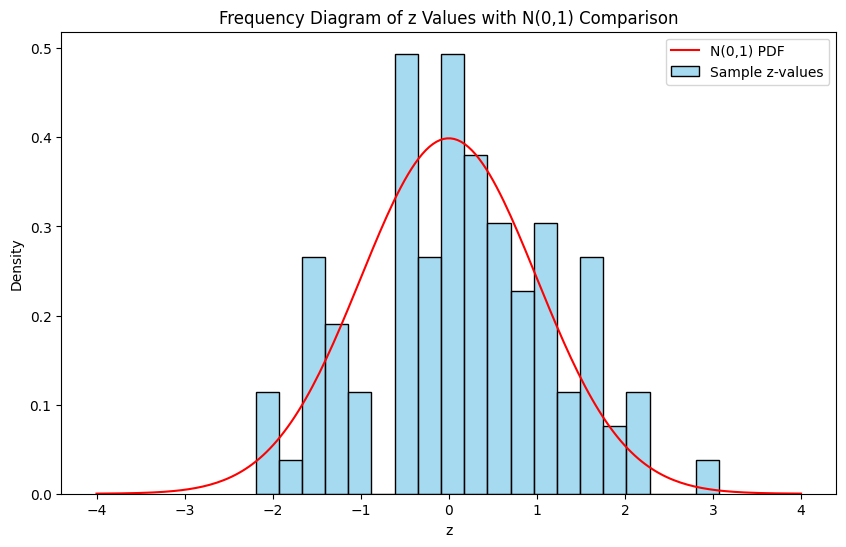

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats

sigma,T = math.sqrt(2), data.shape[0]

z = (sample_means - beta) / (sigma / math.sqrt(T))

plt.figure(figsize=(10, 6))
sns.histplot(z, bins=20, kde=False, color="skyblue", edgecolor='black', stat='density', label='Sample z-values')
x = np.linspace(-4, 4, 200)
plt.plot(x, stats.norm.pdf(x, 0, 1), color="red", label="N(0,1) PDF")

plt.title("Frequency Diagram of z Values with N(0,1) Comparison")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.show()


intervals = [(-4, -3), (-3, -2), (-2, -1), (-1, 0), (0, 1), (1, 2), (2, 3), (3, 4)]

percentages = [(np.sum((z >= low) & (z < high)) / len(z)) * 100 for low, high in intervals]

expected_percentages = [(stats.norm.cdf(high) - stats.norm.cdf(low)) * 100 for low, high in intervals]

difference = abs(np.array(percentages) - np.array(expected_percentages))

normalization = pd.DataFrame({
    'Percentages': percentages,
    'Expected Percentages': expected_percentages,
    'Difference': difference
}, index=[f"[{low},{high}]" for low, high in intervals])





Missing 3.10, 3.3, 3.9 (e)